In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
data=pd.read_csv('shopping_trends_updated.csv')
data

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases,Frequency of Purchases
0,1,55,Male,53,3.1,Yes,14,Fortnightly
1,2,19,Male,64,3.1,Yes,2,Fortnightly
2,3,50,Male,73,3.1,Yes,23,Weekly
3,4,21,Male,90,3.5,Yes,49,Weekly
4,5,45,Male,49,2.7,Yes,31,Annually
...,...,...,...,...,...,...,...,...
3895,3896,40,Female,28,4.2,No,32,Weekly
3896,3897,52,Female,49,4.5,No,41,Bi-Weekly
3897,3898,46,Female,33,2.9,No,24,Quarterly
3898,3899,44,Female,77,3.8,No,24,Weekly


In [3]:
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Purchase Amount (USD)     0
Review Rating             0
Subscription Status       0
Previous Purchases        0
Frequency of Purchases    0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Subscription Status']=le.fit_transform(data['Subscription Status'])
data['Frequency of Purchases']=le.fit_transform(data['Frequency of Purchases'])
data.head()

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases,Frequency of Purchases
0,1,55,1,53,3.1,1,14,3
1,2,19,1,64,3.1,1,2,3
2,3,50,1,73,3.1,1,23,6
3,4,21,1,90,3.5,1,49,6
4,5,45,1,49,2.7,1,31,0


In [5]:
x=data.iloc[:,:-1]
x.head(2)

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases
0,1,55,1,53,3.1,1,14
1,2,19,1,64,3.1,1,2


In [6]:
y=data.iloc[:,-1:]
y.head(2)

,Frequency of Purchases
0,3
1,3


array([[<Axes: title={'center': 'Customer ID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Purchase Amount (USD)'}>,
        <Axes: title={'center': 'Review Rating'}>,
        <Axes: title={'center': 'Subscription Status'}>],
       [<Axes: title={'center': 'Previous Purchases'}>,
        <Axes: title={'center': 'Frequency of Purchases'}>, <Axes: >]],
      dtype=object)

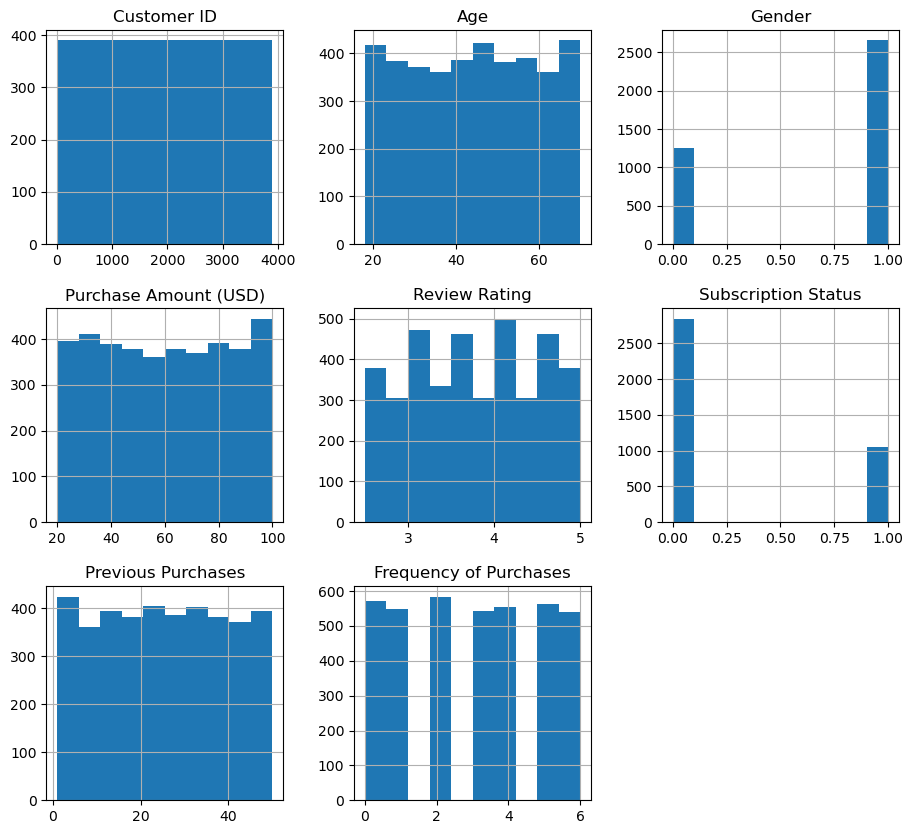

In [7]:
data.hist(figsize=(11,10))

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (2925, 7)

Training data-y- Shape:	 (2925, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (975, 7)

Testing data(y-Outcome) Shape:	 (975, 1)


# Build the Decision Tree model with criterion =GINI index method

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='entropy')
print('*'*100)
print('Decison Tree Model')
print('*'*100)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')
print('='*100)

****************************************************************************************************
Decison Tree Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [6 1 2 4 5 1 6 3 4 0 4 2 1 1 6 3 1 5 1 1 1 3 1 3 3 1 4 0 1 0 5 2 0 3 1 1 4
 4 1 1 1 0 2 6 6 4 2 4 5 3 5 0 5 0 3 4 4 0 1 6 3 5 2 1 1 4 5 6 2 0 6 4 1 0
 5 2 5 2 5 5 0 6 6 0 4 3 6 0 4 4 3 5 2 6 4 0 3 0 5 0 0 2 4 1 2 3 1 2 5 3 2
 1 4 2 4 5 2 0 2 0 4 5 5 2 6 4 3 6 1 0 0 4 0 4 5 2 2 3 6 2 1 0 0 6 3 6 2 1
 1 4 4 5 4 2 4 6 6 4 2 4 6 5 4 0 2 6 0 2 5 3 0 3 3 2 5 1 0 0 5 5 4 0 4 1 6
 5 2 5 2 5

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report\n',classification_report(ytest,ypred))
print('='*100)

****************************************************************************************************
Decison Tree - Performance Measures
****************************************************************************************************
Accuracy Score:	 0.13333333333333333
Confusion Matric:
 [[17 24 21 27 16 16 20]
 [17 15 20 16 27 24 18]
 [23 23 23 17 25 24 14]
 [23 22 19 22 22 21 24]
 [15 22 13 18 17 23 13]
 [19 23 16 17 18 15 19]
 [20 17 26 15 29 19 21]]
Classification Report
               precision    recall  f1-score   support

           0       0.13      0.12      0.12       141
           1       0.10      0.11      0.11       137
           2       0.17      0.15      0.16       149
           3       0.17      0.14      0.15       153
           4       0.11      0.14      0.12       121
           5       0.11      0.12      0.11       127
           6       0.16      0.14      0.15       147

    accuracy                           0.13       975
   macro avg       0.13   

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ytest, ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest, ypred)))
print()
print('Variance Score:\t', explained_variance_score (ytest,ypred))


print()
print('R-Square: \t', r2_score (ytest, ypred))

Mean Squared Error: 	 7.9169230769230765

RMSE: 	 2.813702734285034

Variance Score:	 -0.9704635848290846

R-Square: 	 -0.9706020973253207


[Text(0.4559531656637352, 0.9848484848484849, 'X[6] <= 21.5\nentropy = 2.806\nsamples = 2925\nvalue = [431, 410, 435, 389, 432, 436, 392]'),
 Text(0.17435220316701958, 0.9545454545454546, 'X[0] <= 241.5\nentropy = 2.799\nsamples = 1236\nvalue = [189, 177, 213, 155, 177, 154, 171]'),
 Text(0.007668008970123701, 0.9242424242424242, 'X[1] <= 26.5\nentropy = 2.598\nsamples = 68\nvalue = [15, 1, 9, 13, 6, 10, 14]'),
 Text(0.0025720784805446377, 0.8939393939393939, 'X[3] <= 69.5\nentropy = 1.626\nsamples = 12\nvalue = [6, 1, 0, 4, 0, 0, 1]'),
 Text(0.0015432470883267825, 0.8636363636363636, 'X[3] <= 28.5\nentropy = 1.379\nsamples = 7\nvalue = [2, 0, 0, 4, 0, 0, 1]'),
 Text(0.001028831392217855, 0.8333333333333334, 'X[0] <= 25.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 0, 0, 0, 0, 1]'),
 Text(0.0005144156961089275, 0.803030303030303, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 1]'),
 Text(0.0015432470883267825, 0.803030303030303, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0,

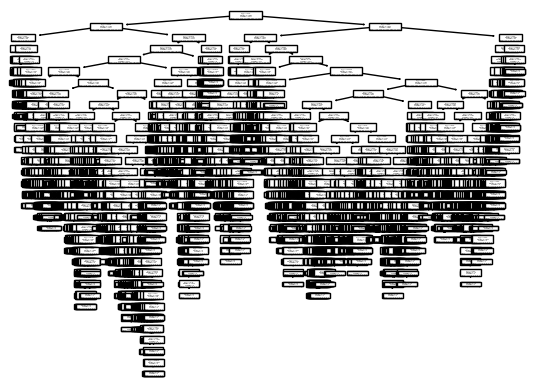

In [21]:
from sklearn import tree
tree.plot_tree(dt_clf)


In [22]:
from sklearn.model_selection import GridSearchCV


In [24]:
dt_clf.feature_names_in_


array(['Customer ID', 'Age', 'Gender', 'Purchase Amount (USD)',
       'Review Rating', 'Subscription Status', 'Previous Purchases'],
      dtype=object)

In [28]:
pruned_tree = DecisionTreeClassifier(ccp_alpha=0.01)  # Adjust the ccp_alpha value
pruned_tree.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.01)

In [29]:
y_pruned = pruned_tree.predict(xtest)
prunedacc = accuracy_score(ytest, y_pruned)
print("Accuracy after pruning:", prunedacc)

Accuracy after pruning: 0.13025641025641024
